In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [11]:
columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

middle_cols = ["root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate","dst_host_count","dst_host_srv_count"]

categorical_cols = ["protocol_type", "service", "flag"]

numeric_cols = ["duration","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate"]

input_cols = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate"]

target_cols = ['attack']

In [12]:
raw_df = pd.read_csv('data/Train.txt', header=None, names=columns)

In [13]:
raw_df.select_dtypes(include=[np.number,object])

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [14]:
raw_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [15]:
raw_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [16]:
raw_df[middle_cols].describe()

,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count
count,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005
std,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000
max,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000


In [17]:
# plt.plot(raw_df.num_compromised, raw_df.num_root, 'r*-', label="wrong_fragment vs urgent")
# plt.xlabel('num_compromised')
# plt.ylabel('num_root')
# plt.title('num_compromised vs num_root')

In [18]:
raw_df[["num_failed_logins", "rerror_rate"]].describe()


,num_failed_logins,rerror_rate
count,125973.000000,125973.000000
mean,0.001222,0.119958
std,0.045239,0.320436
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,5.000000,1.000000


In [19]:
#px.histogram(raw_df, x="num_failed_logins", color='is_host_login')

In [20]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [21]:
input_cols = columns[:-2]
target_cols = columns[-2]

In [22]:
raw_df['attack'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [23]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(raw_df, test_size=0.25, random_state=42)

In [24]:
train_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
69124,0,tcp,exec,S0,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,1.0,1.0,0.0,0.0,neptune,19
20983,0,tcp,sunrpc,S0,0,0,0,0,0,0,...,0.08,0.05,0.00,0.00,1.0,1.0,0.0,0.0,neptune,18
113664,0,tcp,private,S0,0,0,0,0,0,0,...,0.02,0.14,0.02,0.00,1.0,1.0,0.0,0.0,neptune,18
110444,0,tcp,ftp_data,SF,11,0,0,0,0,0,...,0.50,0.11,0.50,0.03,0.0,0.0,0.0,0.0,normal,20
75941,0,udp,other,SF,516,4,0,0,0,0,...,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,normal,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0,tcp,echo,RSTO,0,0,0,0,0,0,...,0.02,0.09,0.00,0.00,0.0,0.0,1.0,1.0,neptune,19
103694,0,tcp,telnet,S0,0,0,0,0,0,0,...,0.02,0.07,0.01,0.00,1.0,1.0,0.0,0.0,neptune,18
860,0,tcp,http,REJ,0,0,0,0,0,0,...,0.02,0.07,0.00,0.00,0.0,0.0,1.0,1.0,neptune,19
15795,0,tcp,http,SF,309,4281,0,0,0,0,...,1.00,0.00,0.05,0.05,0.0,0.0,0.0,0.0,normal,21


In [25]:
train_df[train_df.attack=='warezclient'].describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
count,642.000000,6.420000e+02,642.000000,642.0,642.0,642.0,642.000000,642.0,642.0,642.0,...,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000
mean,662.095016,3.006536e+05,836.457944,0.0,0.0,0.0,9.353583,0.0,1.0,0.0,...,44.777259,0.697274,0.021106,0.611900,0.092181,0.011449,0.002710,0.004548,0.000639,9.732087
std,2331.815032,1.200332e+06,1149.049863,0.0,0.0,0.0,12.867423,0.0,0.0,0.0,...,32.997167,0.368721,0.052437,0.473254,0.103652,0.042539,0.008368,0.021681,0.007498,4.080684
min,0.000000,3.000000e+01,0.000000,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.340000e+02,0.000000,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,...,22.000000,0.310000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
50%,0.000000,3.340000e+02,0.000000,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,...,38.000000,1.000000,0.000000,1.000000,0.090000,0.000000,0.000000,0.000000,0.000000,11.000000
75%,1.000000,1.230000e+03,2449.000000,0.0,0.0,0.0,28.000000,0.0,1.0,0.0,...,56.000000,1.000000,0.020000,1.000000,0.150000,0.000000,0.000000,0.000000,0.000000,13.000000
max,15163.000000,5.135678e+06,2453.000000,0.0,0.0,0.0,28.000000,0.0,1.0,0.0,...,144.000000,1.000000,0.670000,1.000000,0.670000,0.500000,0.050000,0.330000,0.120000,17.000000


In [26]:
print('Attack types:', train_df['attack'].unique())
print()
print('Protocol types: ', train_df['protocol_type'].unique())
print()
print('Service types: ', train_df['service'].unique())
print()
print('Flag types; ', train_df['flag'].unique())

Attack types: ['neptune' 'normal' 'smurf' 'ipsweep' 'back' 'nmap' 'warezclient' 'satan'
 'portsweep' 'teardrop' 'guess_passwd' 'pod' 'rootkit' 'ftp_write'
 'buffer_overflow' 'land' 'multihop' 'imap' 'loadmodule' 'perl'
 'warezmaster' 'phf' 'spy']

Protocol types:  ['tcp' 'udp' 'icmp']

Service types:  ['exec' 'sunrpc' 'private' 'ftp_data' 'other' 'http' 'ecr_i' 'domain_u'
 'eco_i' 'time' 'IRC' 'auth' 'pop_3' 'name' 'uucp' 'ftp' 'smtp' 'iso_tsap'
 'bgp' 'csnet_ns' 'finger' 'Z39_50' 'ctf' 'link' 'imap4' 'netbios_ssn'
 'netbios_dgm' 'login' 'ldap' 'urp_i' 'discard' 'telnet' 'hostnames'
 'supdup' 'netstat' 'domain' 'daytime' 'systat' 'printer' 'echo' 'whois'
 'kshell' 'http_443' 'klogin' 'mtp' 'efs' 'courier' 'gopher' 'sql_net'
 'nnsp' 'vmnet' 'uucp_path' 'netbios_ns' 'X11' 'ntp_u' 'ssh' 'pop_2'
 'shell' 'rje' 'remote_job' 'nntp' 'http_2784' 'urh_i' 'red_i' 'tim_i'
 'pm_dump' 'tftp_u' 'harvest']

Flag types;  ['S0' 'SF' 'RSTO' 'RSTR' 'REJ' 'S3' 'SH' 'S1' 'RSTOS0' 'S2' 'OTH']


In [27]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

In [28]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_cols].copy()

In [29]:
train_inputs.select_dtypes('object').columns.tolist() == categorical_cols and train_inputs.select_dtypes(include=np.number).columns.tolist() == numeric_cols

True

## Imputation (if any) ##

In [30]:
from sklearn.impute import SimpleImputer

In [31]:
#raw_df[numeric_cols].isna().sum()

## Scaling Numeric Features

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler(feature_range=(0,1))

In [34]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [35]:
print("Minimum:")
print(scaler.data_min_)

Minimum:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [36]:
print("Maximum:")
list(scaler.data_max_)

Maximum:


[42908.0,
 1379963888.0,
 1309937401.0,
 1.0,
 3.0,
 3.0,
 77.0,
 5.0,
 1.0,
 7479.0,
 1.0,
 2.0,
 7468.0,
 43.0,
 2.0,
 9.0,
 0.0,
 1.0,
 1.0,
 511.0,
 511.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 255.0,
 255.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [37]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])                

In [38]:
train_inputs.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,94479.000000,9.447900e+04,9.447900e+04,94479.000000,94479.000000,94479.000000,94479.000000,94479.000000,94479.000000,94479.000000,...,94479.000000,94479.000000,94479.000000,94479.000000,94479.000000,94479.000000,94479.000000,94479.000000,94479.000000,94479.000000
mean,0.006623,3.594897e-05,1.929189e-05,0.000201,0.007533,0.000035,0.002653,0.000237,0.395559,0.000042,...,0.714793,0.454151,0.521693,0.082558,0.147668,0.032521,0.283945,0.277779,0.118947,0.120455
std,0.060396,4.682530e-03,3.544531e-03,0.014180,0.084370,0.004338,0.027968,0.008727,0.488973,0.003644,...,0.388607,0.434105,0.448898,0.188181,0.307964,0.112656,0.444563,0.445332,0.306565,0.319610
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.321569,0.043137,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.188489e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.247059,0.520000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.000052e-07,4.007825e-07,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,0.666667,1.000000,0.800000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Converting categorical columns to numeric using OneHotEncoder

In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [42]:
raw_df_categ = raw_df[categorical_cols]
encoder.fit(raw_df_categ)

C:\Users\okore\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [43]:
encoder.categories_

[array(['icmp', 'tcp', 'udp'], dtype=object),
 array(['IRC', 'X11', 'Z39_50', 'aol', 'auth', 'bgp', 'courier',
        'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u',
        'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp',
        'ftp_data', 'gopher', 'harvest', 'hostnames', 'http', 'http_2784',
        'http_443', 'http_8001', 'imap4', 'iso_tsap', 'klogin', 'kshell',
        'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm',
        'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u',
        'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private',
        'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh',
        'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time',
        'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois'],
       dtype=object),
 array(['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3',
        'SF', 'SH'], dtype=object)]

In [44]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

In [47]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

# train_inputs_encoded = encoder.transform(train_inputs[categorical_cols])
# val_inputs_encoded = encoder.transform(val_inputs[categorical_cols])

# train_inputs_encoded_df = pd.DataFrame(train_inputs_encoded, columns=encoded_cols)
# val_inputs_encoded_df = pd.DataFrame(val_inputs_encoded, columns=encoded_cols)

# train_inputs = pd.concat([train_inputs[numeric_cols],\
#                           train_inputs_encoded_df], axis=1)
# val_inputs = pd.concat([val_inputs[numeric_cols],\
#                           val_inputs_encoded_df],axis=1)

#### To display all columns in the dataframe

In [48]:
pd.set_option('display.max_columns', None)

In [49]:
train_inputs

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
69124,0.0,tcp,exec,S0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.039139,0.023483,1.0,1.0,0.0,0.0,0.60,0.10,0.0,1.000000,0.047059,0.05,0.07,0.00,0.00,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20983,0.0,tcp,sunrpc,S0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.285714,0.041096,1.0,1.0,0.0,0.0,0.14,0.04,0.0,1.000000,0.082353,0.08,0.05,0.00,0.00,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
113664,0.0,tcp,private,S0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.228963,0.039139,1.0,1.0,0.0,0.0,0.17,0.06,0.0,0.227451,0.003922,0.02,0.14,0.02,0.00,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
110444,0.0,tcp,ftp_data,SF,7.971223e-09,0.000000e+00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003914,0.003914,0.0,0.0,0.0,0.0,1.00,0.00,0.0,0.109804,0.266667,0.50,0.11,0.50,0.03,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Saving Processed data to disk

In [50]:
print('train_inputs: ', train_inputs.shape)
print('train_targets: ', train_targets.shape)
print('val_inputs: ', val_inputs.shape)
print('val_targets: ', val_targets.shape)

train_inputs:  (94479, 125)
train_targets:  (94479,)
val_inputs:  (31494, 125)
val_targets:  (31494,)


In [51]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')

In [52]:
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')

We can read the data back using pd.read_parquet

In [53]:
%%time
train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')
val_targets = pd.read_parquet('val_targets.parquet')

CPU times: total: 656 ms
Wall time: 216 ms


In [54]:
train_inputs[numeric_cols + encoded_cols]

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
69124,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.039139,0.023483,1.0,1.0,0.0,0.0,0.60,0.10,0.0,1.000000,0.047059,0.05,0.07,0.00,0.00,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20983,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.285714,0.041096,1.0,1.0,0.0,0.0,0.14,0.04,0.0,1.000000,0.082353,0.08,0.05,0.00,0.00,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
113664,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.228963,0.039139,1.0,1.0,0.0,0.0,0.17,0.06,0.0,0.227451,0.003922,0.02,0.14,0.02,0.00,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
110444,0.0,7.971223e-09,0.000000e+00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003914,0.003914,0.0,0.0,0.0,0.0,1.00,0.00,0.0,0.109804,0.266667,0.50,0.11,0.50,0.03,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75941,0.0,3.739228e-07,3.053581e-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [55]:
train_inputs[numeric_cols + encoded_cols]['land']

69124     0.0
20983     0.0
113664    0.0
110444    0.0
75941     0.0
         ... 
119879    0.0
103694    0.0
860       0.0
15795     0.0
121958    0.0
Name: land, Length: 94479, dtype: float64

In [56]:
#train_inputs[numeric_cols + encoded_cols].select_dtypes(include=np.number).columns.tolist()

To make sure all that the dataset is only populated with numbers

In [57]:
train_inputs_df = train_inputs[numeric_cols + encoded_cols]
train_targets_df = train_targets

train_inputs_ravel = train_inputs_df.to_numpy()
train_targets_ravel = train_targets_df.values.ravel()

In [96]:
train_inputs_df.shape

(94479, 122)

In [58]:
val_inputs_df = val_inputs[numeric_cols + encoded_cols]
val_targets_df = val_targets

val_inputs_ravel = val_inputs_df.to_numpy()
val_targets_ravel =  val_targets.values.ravel()

In [59]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1, multi_class='ovr', solver='lbfgs', random_state=42, max_iter=1000)

In [60]:
print(train_inputs_ravel)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.23918903e-07 3.26809510e-06 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.11602357e-08 5.34376680e-08 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]]


In [61]:
# Create an instance of Softmax and fit the data.
logreg.fit(train_inputs_ravel,\
           train_targets_ravel)

LogisticRegression(C=1, max_iter=1000, multi_class='ovr', random_state=42)

In [62]:
for item in zip(numeric_cols+encoded_cols, logreg.coef_.tolist()[0]):
    print(item)

('duration', -0.7845880661379651)
('src_bytes', 0.01696258701588857)
('dst_bytes', 0.0010388475118435182)
('land', 6.541819981339307e-07)
('wrong_fragment', 1.7541683149365795e-05)
('urgent', -2.2117882166022457e-05)
('hot', 10.426011472804966)
('num_failed_logins', -0.12580523308368832)
('logged_in', 5.970750607915275)
('num_compromised', 0.0552121477659711)
('root_shell', -0.5234161722129785)
('su_attempted', -0.03047066315022535)
('num_root', -0.0005300131299525356)
('num_file_creations', -0.12381563971485225)
('num_shells', -0.0007576202084026777)
('num_access_files', -0.9596096367560025)
('num_outbound_cmds', 0.0)
('is_host_login', -6.426319944841519e-06)
('is_guest_login', -0.6394683293932084)
('count', -3.991984474798769)
('srv_count', -5.789387609796303)
('serror_rate', -0.8722000013366467)
('srv_serror_rate', -0.4645133708290782)
('rerror_rate', -1.1990472396390444)
('srv_rerror_rate', 8.083799730440198)
('same_srv_rate', 0.5070733002576967)
('diff_srv_rate', 0.055251912789256

In [63]:
weight_df = pd.DataFrame({
    'feature': (numeric_cols + encoded_cols),
    'weight': logreg.coef_.tolist()[0]
})

In [64]:
plt.figure(figsize = (10,50))
#sns.barplot(data=weight_df.sort_values("weight", ascending=False), x='weight', y='feature')

<Figure size 1000x5000 with 0 Axes>

<Figure size 1000x5000 with 0 Axes>

In [65]:
train_preds = logreg.predict(train_inputs_ravel)
print(train_preds)

['neptune' 'neptune' 'neptune' ... 'neptune' 'normal' 'normal']


In [66]:
logreg.classes_

array(['back', 'buffer_overflow', 'ftp_write', 'guess_passwd', 'imap',
       'ipsweep', 'land', 'loadmodule', 'multihop', 'neptune', 'nmap',
       'normal', 'perl', 'phf', 'pod', 'portsweep', 'rootkit', 'satan',
       'smurf', 'spy', 'teardrop', 'warezclient', 'warezmaster'],
      dtype=object)

Accuracy Score

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [68]:
accuracy_score(train_targets, train_preds)

0.9788101059494703

In [69]:
#confusion_matrix(train_targets, train_preds, normalize='true')
type(logreg)

sklearn.linear_model._logistic.LogisticRegression

In [70]:
def predict_and_plot(inputs, targets, model, name=''):
    preds = model.predict(inputs.to_numpy())
    
    accuracy = accuracy_score(targets.values.ravel(), preds)
    print("Accuracy on {}: {:.2f}% \t".format(name, accuracy * 100))
    
    # cf = confusion_matrix(targets, preds, normalize='true')
    # plt.figure()
    # sns.heatmap(cf, annot=True)
    # plt.xlabel("Prediction")
    # plt.ylabel("Target")
    # plt.title('{} Confusion Matrix'.format(name))
    
    return preds

In [71]:
train_preds = predict_and_plot(train_inputs_df, train_targets_df, logreg, 'Training')

Accuracy on Training: 97.88% 	


In [72]:
val_preds = predict_and_plot(val_inputs_df, val_targets_df, logreg, 'Validation')

Accuracy on Validation: 97.74% 	


<Axes: xlabel='attack'>

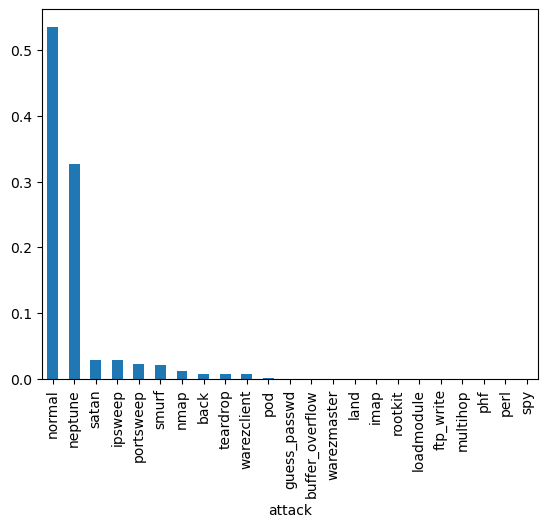

In [73]:
raw_df['attack'].value_counts(normalize=True).plot(kind='bar')

In [74]:
my_dict = {item:raw_df[raw_df.attack == item].index.tolist() for item in raw_df.attack.unique()}
my_dict.keys()

dict_keys(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep', 'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back', 'guess_passwd', 'ftp_write', 'multihop', 'rootkit', 'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land', 'loadmodule', 'spy', 'perl'])

In [75]:
for item in my_dict.keys():
    print(f"{item} {len(my_dict[item])}")

normal 67343
neptune 41214
warezclient 890
ipsweep 3599
portsweep 2931
teardrop 892
nmap 1493
satan 3633
smurf 2646
pod 201
back 956
guess_passwd 53
ftp_write 8
multihop 7
rootkit 10
buffer_overflow 30
imap 11
warezmaster 20
phf 4
land 18
loadmodule 9
spy 2
perl 3


In [76]:
list(set(val_inputs.index).intersection(set(my_dict['land'])))

[26748, 62554, 105684, 63005]

Trial and Error

In [77]:
neptune_inputs_df = val_inputs_df.loc[list(set(val_inputs_df.index).intersection(set(my_dict['neptune'])))]

In [78]:
neptune_targets_df = val_targets_df.loc[list(set(val_inputs_df.index).intersection(set(my_dict['neptune'])))]

Main Thing

In [79]:
def pred_by_att_type(att_type: str, model):
    df_by_att_type = val_inputs_df.loc[list(set(val_inputs_df.index).intersection(set(my_dict[att_type])))], val_targets_df.loc[list(set(val_inputs_df.index).intersection(set(my_dict[att_type])))]
    try:
        prediction = predict_and_plot(df_by_att_type[0], df_by_att_type[1], model, att_type)
        print(len(prediction))
    except Exception as e:
        pass

In [80]:
for item in raw_df.attack.unique():
    pred_by_att_type(item, logreg)

Accuracy on normal: 99.21% 	
16774
Accuracy on neptune: 99.95% 	
10316
Accuracy on warezclient: 45.56% 	
248
Accuracy on ipsweep: 94.88% 	
918
Accuracy on portsweep: 97.52% 	
727
Accuracy on teardrop: 99.12% 	
227
Accuracy on nmap: 91.64% 	
383
Accuracy on satan: 86.72% 	
919
Accuracy on smurf: 100.00% 	
662
Accuracy on pod: 94.34% 	
53
Accuracy on back: 16.22% 	
222
Accuracy on guess_passwd: 92.31% 	
13
Accuracy on rootkit: 0.00% 	
3
Accuracy on buffer_overflow: 20.00% 	
10
Accuracy on imap: 0.00% 	
3
Accuracy on warezmaster: 0.00% 	
8
Accuracy on phf: 0.00% 	
1
Accuracy on land: 50.00% 	
4
Accuracy on loadmodule: 0.00% 	
1
Accuracy on spy: 0.00% 	
1
Accuracy on perl: 0.00% 	
1


## Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
train_inputs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94479 entries, 69124 to 121958
Columns: 122 entries, duration to flag_SH
dtypes: float64(122)
memory usage: 88.7 MB


In [83]:
forest = RandomForestClassifier(n_estimators=60, random_state=2, max_features=11)

In [84]:
forest.fit(train_inputs_ravel, train_targets_ravel)

RandomForestClassifier(max_features=11, n_estimators=60, random_state=2)

In [85]:
forest.score(val_inputs_ravel, val_targets_ravel)

0.9967930399441164

In [86]:
forest.score(train_inputs_ravel, train_targets_ravel)

0.9997459752960975

In [87]:
for item in raw_df.attack.unique():
    pred_by_att_type(item, forest)

Accuracy on normal: 99.92% 	
16774
Accuracy on neptune: 99.98% 	
10316
Accuracy on warezclient: 95.97% 	
248
Accuracy on ipsweep: 98.69% 	
918
Accuracy on portsweep: 99.59% 	
727
Accuracy on teardrop: 99.56% 	
227
Accuracy on nmap: 96.34% 	
383
Accuracy on satan: 97.61% 	
919
Accuracy on smurf: 100.00% 	
662
Accuracy on pod: 94.34% 	
53
Accuracy on back: 100.00% 	
222
Accuracy on guess_passwd: 92.31% 	
13
Accuracy on rootkit: 0.00% 	
3
Accuracy on buffer_overflow: 30.00% 	
10
Accuracy on imap: 66.67% 	
3
Accuracy on warezmaster: 75.00% 	
8
Accuracy on phf: 100.00% 	
1
Accuracy on land: 25.00% 	
4
Accuracy on loadmodule: 0.00% 	
1
Accuracy on spy: 0.00% 	
1
Accuracy on perl: 0.00% 	
1


## Gradient Boosting

In [88]:
from sklearn.ensemble import GradientBoostingClassifier

In [89]:
# gbrt = GradientBoostingClassifier(random_state=0)
# gbrt.fit(train_inputs_ravel, train_targets_ravel)

In [90]:
# gbrt.score(val_inputs_ravel, val_targets_ravel)

In [91]:
# forest.score(train_inputs_ravel, train_targets_ravel)

In [92]:
#for item in raw_df.attack.unique():
#    pred_by_att_type(item, forest)

### Saving and Loading Trained Models

In [93]:
import pickle

In [94]:
with open('NIDS_RandomForest.pkl', 'wb') as file:
    pickle.dump(forest, file)

In [ ]:
import joblib

In [362]:
anomaly_RandForest = {
    'model': forest,
    'scaler': scaler,
    'encoder': encoder, 
    'input_cols': input_cols,
    'target_cols': target_cols,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [364]:
joblib.dump(anomaly_RandForest, 'anomaly_RandForest')

['anomaly_RandForest']